In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)


In [2]:
def asf_project(pr):
    name = pr.split("-")[0]
    if name == "incubator":
        return pr.split("-")[1]
    return name

In [3]:
project = "ozone"

In [4]:
# Parameters
project = "nifi"


In [5]:
actions = pd.read_csv("github-action-run.csv.gz")
                          
actions.createdat = pd.to_datetime(actions.createdat * 1000000, utc = True)
actions.updatedat = pd.to_datetime(actions.updatedat * 1000000, utc = True)
actions.firstjobstarted = pd.to_datetime(actions.firstjobstarted * 1000000, utc = True)
actions.lastjobcompleted = pd.to_datetime(actions.lastjobcompleted * 1000000, utc = True)                

In [6]:
actions["project"] = actions.repo.apply(asf_project)
actions["jobhours"] = actions.jobseconds / 60 / 60
actions["month"] = actions.createdat.dt.strftime("%Y-%m")

In [7]:
actions =  actions[actions.month.isin(["2021-03","2021-02"])]
last_month = "2021-03"
actions = actions[actions.project == project]

## Number of jobhours used by month

Maximum available value is 180 * 24 * days == 129600 (30 days) .. 133920 (31 days)

In [8]:
actions[["jobhours"]].groupby([actions.project,actions.month]).count().reset_index().groupby("month").sum()

,jobhours
month,
2021-02,376
2021-03,513


## Number of jobs executed by git repositories (last month)

In [9]:
actions[actions.month == last_month][["repo","jobhours"]].groupby("repo").agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False).head(20)

jobhours                     
                         sum      mean        max
repo                                             
nifi             1208.525833  3.544064   9.324167
nifi-minifi-cpp  1171.161389  7.012942  11.313056
nifi-registry       1.220278  0.244056   0.271667

## Job hour statustics per workflows

In [10]:
actions[actions.month == last_month][["repo","workflowid","jobhours"]].groupby(["repo","workflowid"]).agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False)

jobhours                     
                                    sum      mean        max
repo            workflowid                                  
nifi            605175      1208.525833  3.544064   9.324167
nifi-minifi-cpp 2057058     1171.161389  7.012942  11.313056
nifi-registry   612158         1.220278  0.244056   0.271667

## Slowest workflow runs


In [11]:
actions.sort_values("jobhours", ascending=False).head(25)

,org,repo,id,runnumber,createdat,updatedat,status,conclusion,workflowid,firstjobstarted,lastjobcompleted,jobdetails,jobs,jobseconds,project,jobhours,month
757713,apache,nifi-minifi-cpp,704636469,1073,2021-03-31 10:26:05+00:00,2021-03-31 11:55:10+00:00,completed,success,2057058,2021-03-31 10:27:05+00:00,2021-03-31 11:55:01+00:00,True,15,40727,nifi,11.313056,2021-03
757710,apache,nifi-minifi-cpp,704069121,1070,2021-03-31 06:55:57+00:00,2021-03-31 08:42:24+00:00,completed,success,2057058,2021-03-31 06:56:12+00:00,2021-03-31 08:42:14+00:00,True,15,40030,nifi,11.119444,2021-03
757666,apache,nifi-minifi-cpp,682283873,1030,2021-03-24 07:46:33+00:00,2021-03-24 09:25:12+00:00,completed,failure,2057058,2021-03-24 07:46:50+00:00,2021-03-24 09:25:02+00:00,True,15,39349,nifi,10.930278,2021-03
757648,apache,nifi-minifi-cpp,678855402,1014,2021-03-23 08:06:05+00:00,2021-03-23 09:32:00+00:00,completed,failure,2057058,2021-03-23 08:06:28+00:00,2021-03-23 09:31:49+00:00,True,15,39153,nifi,10.875833,2021-03
757670,apache,nifi-minifi-cpp,682950434,1034,2021-03-24 12:01:50+00:00,2021-03-24 13:43:12+00:00,completed,success,2057058,2021-03-24 12:13:36+00:00,2021-03-24 13:43:04+00:00,True,15,39121,nifi,10.866944,2021-03
757683,apache,nifi-minifi-cpp,696953766,1046,2021-03-29 06:58:20+00:00,2021-03-29 08:42:37+00:00,completed,success,2057058,2021-03-29 06:58:42+00:00,2021-03-29 08:38:22+00:00,True,15,38922,nifi,10.811667,2021-03
757649,apache,nifi-minifi-cpp,678859331,1015,2021-03-23 08:07:37+00:00,2021-03-23 09:58:10+00:00,completed,success,2057058,2021-03-23 08:30:20+00:00,2021-03-23 09:58:01+00:00,True,15,38469,nifi,10.685833,2021-03
757714,apache,nifi-minifi-cpp,705412164,1074,2021-03-31 15:09:00+00:00,2021-03-31 16:37:11+00:00,completed,success,2057058,2021-03-31 15:09:19+00:00,2021-03-31 16:37:01+00:00,True,15,37981,nifi,10.550278,2021-03
757667,apache,nifi-minifi-cpp,682464204,1031,2021-03-24 08:59:05+00:00,2021-03-24 10:27:39+00:00,completed,failure,2057058,2021-03-24 08:59:34+00:00,2021-03-24 10:27:29+00:00,True,15,36281,nifi,10.078056,2021-03
757685,apache,nifi-minifi-cpp,697388858,1048,2021-03-29 09:45:07+00:00,2021-03-29 11:12:09+00:00,completed,success,2057058,2021-03-29 09:45:32+00:00,2021-03-29 11:11:59+00:00,True,15,36237,nifi,10.065833,2021-03


In [12]:
job = pd.read_csv("github-action-job.csv.gz")                          
job.startedat = pd.to_datetime(job.startedat * 1000000, utc = True)
job.completedat = pd.to_datetime(job.completedat * 1000000, utc = True)
job["project"] = job.repo.apply(asf_project)

In [13]:
job["jobhours"] = (job.completedat - job.startedat).dt.seconds / 60 / 60

In [14]:
job = job[job.project == project]

## Slowest job executions by job names

In [15]:
job[["jobhours"]].groupby([job.org,job.repo, job.name]).sum().reset_index().sort_values("jobhours", ascending=False).head(25)

,org,repo,name,jobhours
3,apache,nifi,Windows - JDK 1.8,775.215556
2,apache,nifi,Ubuntu - JDK 11 EN,741.959444
1,apache,nifi,Ubuntu - JDK 1.8 FR,600.368889
0,apache,nifi,MacOS - JDK 1.8 JP,485.017500
17,apache,nifi-minifi-cpp,windows-vs2017,425.755278
18,apache,nifi-minifi-cpp,windows-vs2019,304.055278
4,apache,nifi-minifi-cpp,Docker integration tests,229.710000
11,apache,nifi-minifi-cpp,ubuntu-16.04-all,190.402500
9,apache,nifi-minifi-cpp,macos-xcode12.0,176.375278
8,apache,nifi-minifi-cpp,macos-xcode11.2.1,175.835000


## Number of job executions per status

In [16]:
job[["id"]].groupby([job.org,job.repo,  job.conclusion]).count().reset_index().sort_values("id", ascending=False).head(25)

,org,repo,conclusion,id
5,apache,nifi-minifi-cpp,success,4538
2,apache,nifi,success,2259
1,apache,nifi,failure,530
4,apache,nifi-minifi-cpp,failure,419
0,apache,nifi,cancelled,102
3,apache,nifi-minifi-cpp,cancelled,34
6,apache,nifi-registry,success,20


In [17]:
start = job.loc[:,["org","repo","project","id","runid","startedat"]]
start["value"] = 1
start = start.rename(columns={"startedat":"date"})

end = job.loc[:,["org","repo","project","id","runid","completedat"]]
end["value"] = -1
end = end.rename(columns={"completedat":"date"})
events = pd.concat([start, end]).sort_values("date")
events["running"] = events.value.cumsum()


## Average (12h window) parallel running/queued job at a given time

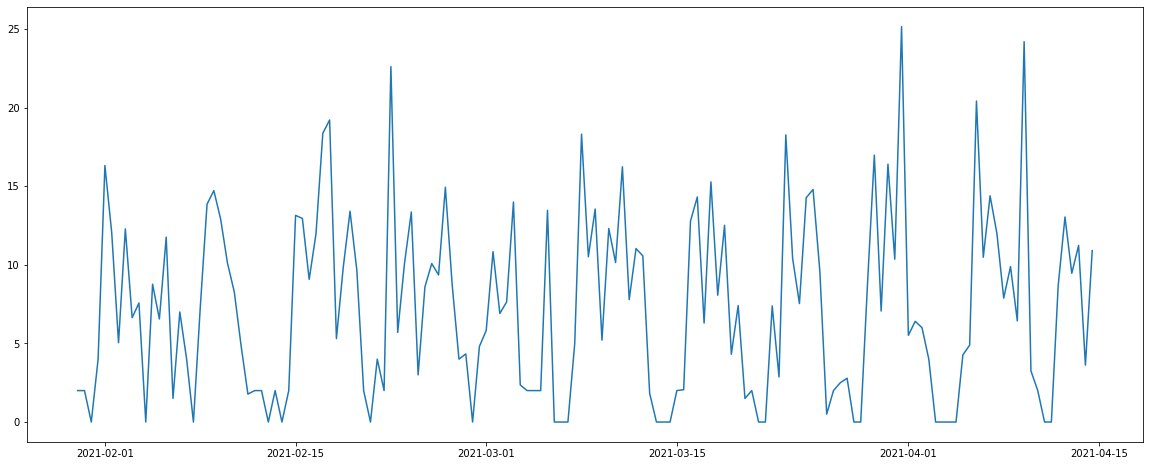

In [18]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").mean().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()

In [19]:
## Max (12h window) parallel running/queued job at a given time

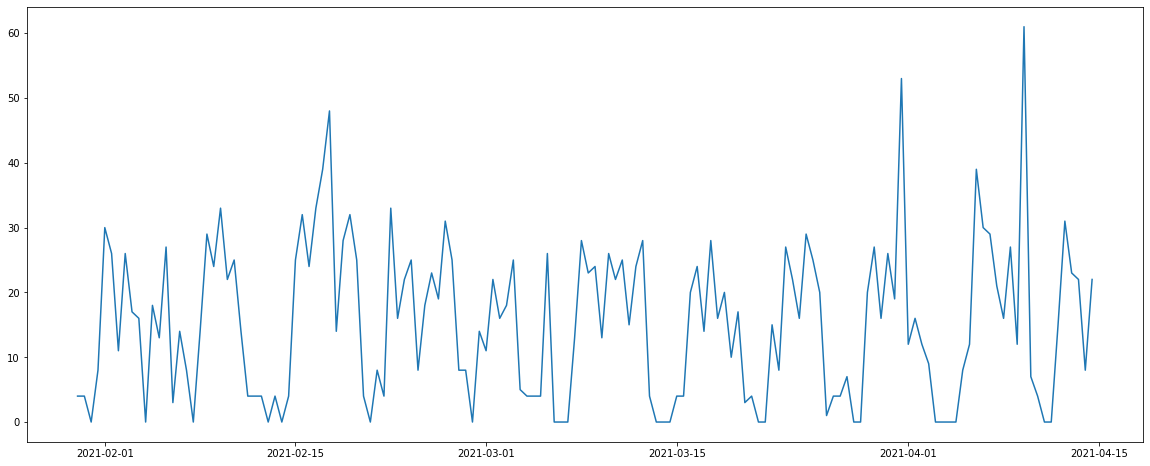

In [20]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").max().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()